## Visualization of the convolutional layers with Shapley Additive Explanations

<img src="https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_header.svg" />

**SHAP (SHapley Additive exPlanations)** is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).


$$
\Phi(v)_i=\sum_{K \ni i} \frac{(k-1) !(n-k) !}{n !}(v(K)-v(K \backslash i))
$$



[Documantation](https://shap.readthedocs.io/en/latest/).

Adopted from [here](https://github.com/hse-ds/iad-deep-learning/blob/master/2022/seminars/sem05/sem05_task.ipynb)


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np

In [ ]:
import json

import shap

### Studying the layers of ResNet on ImageNet data.

 Each level in a deep CNN learns filters of increasing complexity. On the early layers, basic object detection filters are learned, such as edges and corners. Middle layers learn filters that detect parts of objects — for faces, they might learn to respond to eyes and noses. The final layers have higher-level representations: they learn to recognize entire objects in various forms and positions.

We will use the GradientExplainer model, which calculates expectation of the gradients to estimate inputs at different parts of the model. We will take 50 samples to calculate expected gradients and examine the features of the first layers of ResNet.

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


def normalize(image):
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll axes so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

In [ ]:
# Load proper model (resnet50) and data (imagenet50) from Shap wrapper
model = resnet18(pretrained=True).eval()
X, y = shap.datasets.imagenet50()
X /= 255

to_explain = X[[1, 41]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)

with open(fname) as f:
    class_names = json.load(f)

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s]


#### Layer 1

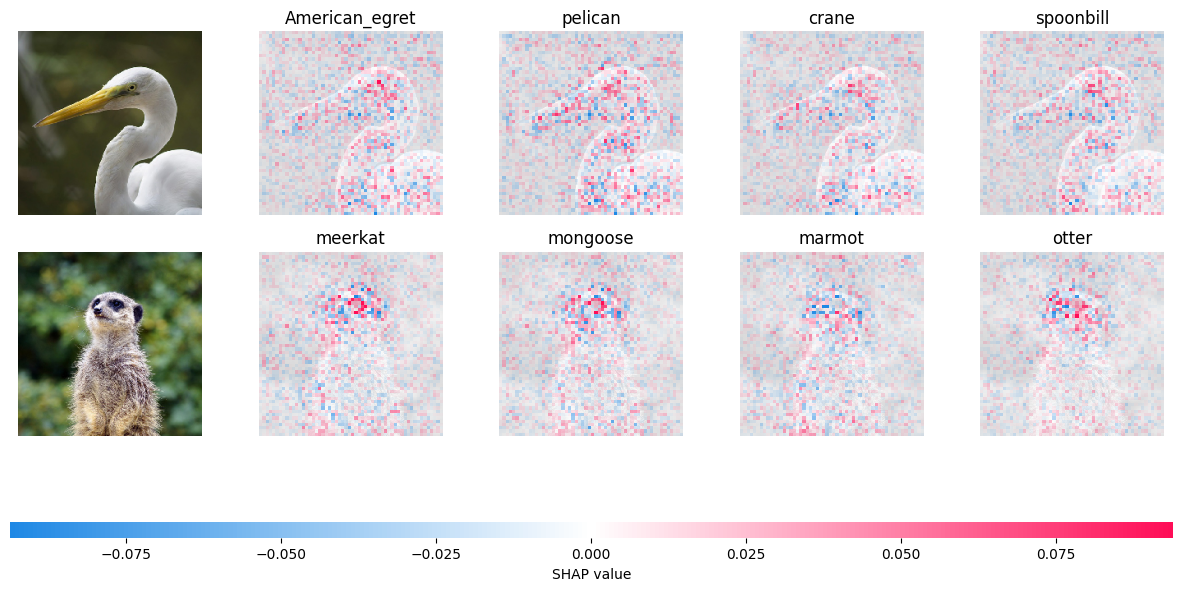

In [ ]:
# create GradientExplainer object for convolution layer from Resnet Layer1
e = shap.GradientExplainer((model, model.layer1[0].conv2), normalize(X))
# receive shap_values
shap_values, indexes = e.shap_values(
    normalize(to_explain), ranked_outputs=4, nsamples=50
)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]

shap.image_plot(shap_values, to_explain, index_names)

#### Layer 2

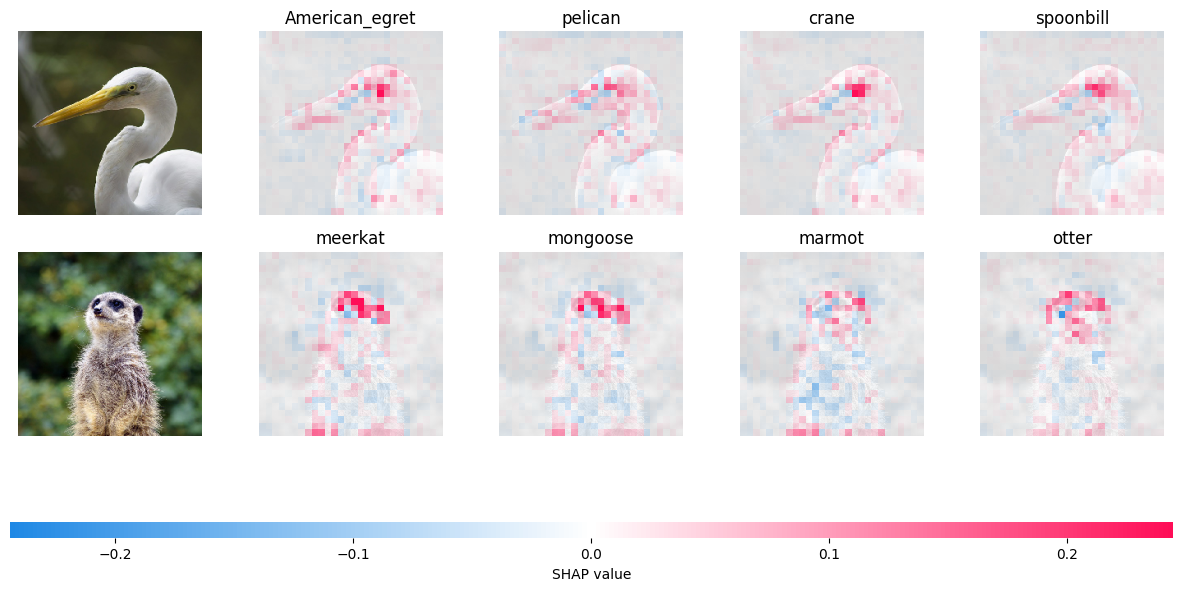

In [ ]:
e = shap.GradientExplainer((model, model.layer2[0].conv2), normalize(X))
shap_values, indexes = e.shap_values(
    normalize(to_explain), ranked_outputs=4, nsamples=50
)
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]
shap.image_plot(shap_values, to_explain, index_names)

#### Layer 4

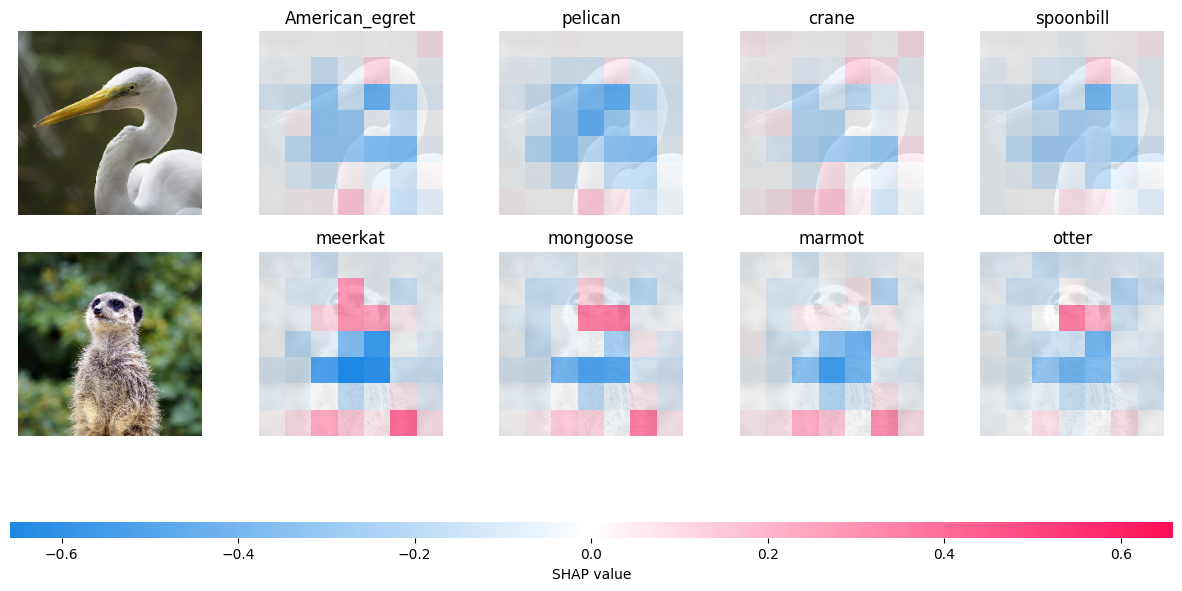

In [ ]:
e = shap.GradientExplainer((model, model.layer4[0].conv2), normalize(X))
shap_values, indexes = e.shap_values(
    normalize(to_explain), ranked_outputs=4, nsamples=50
)
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]
shap.image_plot(shap_values, to_explain, index_names)